# データ・パッケージの読込

## パッケージ読み込み

In [1]:
### 必要なパッケージ（ライブラリ）の読み込み ###
import pandas as pd             # データフレーム型変数を取り扱えるパッケージ"pandas"を読込み（以降"pd"と略記）
import matplotlib.pyplot as plt # グラフ描画のパッケージ"matplotlib"を読込み（以降"plt"と略記）
import seaborn as sns           # 上記matplotlibをベースにした高機能可視化モジュール"saeborn"を読込み（以降"sns"と略記）
import numpy as np              # 数値演算のためのパッケージ"numpy"を読込み（以降"np"と略記）

## データ読み込み

In [3]:
### データの読込 ###
df = pd.read_excel("./data/20240820/演習03_自動車の不具合情報_2020年4-5月.xlsx")

In [4]:
### データの確認 ###
df

,#,受付日,性別,住所,申告方法,車名,通称名,初度登録年月,総走行距離,型式,原動機型式,不具合装置,発生時期,申告内容の要約
0,1,2020年05月31日,男性,千葉,ＨＰ,ＢＭＷ,３２０Ｄ,2017年06月,"40,000Km",LDA-8C20,B47D20A,エンジン,２０２０年５月３０日,自宅前で洗車後、エンジンをかけようとしたところ、セルモーターはまわるもののエンジンがかからな...
1,2,2020年05月31日,男性,愛知,ＨＰ,スズキ,ソリオ,2016年06月,"33,000Km",DAA-MA36S,K12C-WA05A,制動装置,２０１９年４月,リアーブレーキよりギーギーと異常音が発生する。ブレーキが甘い。
2,3,2020年05月31日,男性,岐阜,ＨＰ,ニッサン,エルグランド,2009年09月,"75,000Km",CBA-NE51,VQ35,走行装置,２０２０年３月頃から,右フロントハブベアリングの不良により、走行中に異音が出るようになった。
3,4,2020年05月30日,男性,宮城,ＨＰ,いすゞ,フォワード,2012年06月,"55,000Km",LKG-FTR90T2 改,4HK1,制動装置,２０２０年５月２８日,ブレーキロッドとブレーキバックプレートの防水ブーツの間からホイールシリンダー内に水が混入し、...
4,5,2020年05月30日,男性,富山,ＨＰ,ホンダ,ＶＥＺＥＬハイブリッド,2015年06月,不明,DAA-RU3,LEB-H1,エンジン,新車購入３年後の初回車検の直後,スマートキーシステムエラーが表示され、エンジンスタート・エンジンストップの操作が不能になった。
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,409,2020年04月01日,男性,神奈川,ﾌﾘｰﾀﾞｲｱﾙ,トヨタ,アルファード,2020年03月,不明,DBA-AGH30W,2AR,その他,購入直後から,バックモニターの性能が悪く、逆光になった際に白くぼやけたり、夜間のバック時に点灯している灯火...
409,410,2020年04月01日,女性,千葉,ﾌﾘｰﾀﾞｲｱﾙ,ＢＭＷ,２１８ｄ,2015年11月,"50,000Km",LDA-2C20,B47C20A,動力伝達,総走行距離５万ｋｍ弱,走行中にドライブトレーン警告灯が点灯するようになった。
410,411,2020年04月01日,法人,埼玉,ＨＰ,三菱,ふそうキャンター,2019年12月,"7,273Km",2RG-FEA20,4P10,エンジン,２０２０年３月,エンジンＯＩＬ警告灯が点灯した。
411,412,2020年04月01日,男性,埼玉,ﾌﾘｰﾀﾞｲｱﾙ,三菱,ふそうスーパーグレート,2015年09月,"400,000Km",QPG-FV60VY,6R10,エンジン,２０２０年３月２８日,ラジエーターファンの付け根が折損した。


# 分析対象データの絞り込み

## 分析対象を検討

In [5]:
# 車名ごと、不具合装置ごとにクロス集計を取り、ボリュームの多い比較対象を探す
cross = pd.crosstab(df['不具合装置'], df['車名'])

# 車名（列方向）について件数の多い順に並べるための順番定義
col_order = cross.sum().sort_values(ascending=False).index

# 不具合装置（行方向）について件数の多い順に並べるための順番定義
row_order = cross.sum(axis=1).sort_values(ascending=False).index

# 車名、不具合装置について出現件数の多い順に並べ替えたクロス集計表を出力
cross.loc[row_order, col_order]

車名,ニッサン,トヨタ,ホンダ,スズキ,三菱,フォルクスワーゲン,スバル,アウディ,マツダ,ＢＭＷ,...,フェラーリ,ニッサンＭＴ,ニッサンUK( 生産国： 英国),トヨタオートボデー,ジャガー,ホンダオブザユーケー,フォード,モト・グッツィ,ルノー,組立
不具合装置,,,,,,,,,,,,,,,,,,,,,
エンジン,10,11,17,9,9,7,6,6,6,4,...,1,0,1,0,0,1,0,0,1,0
動力伝達,7,4,3,5,3,7,9,8,3,4,...,0,2,0,0,0,0,0,0,0,0
車枠・車体,2,15,3,3,1,1,2,2,2,1,...,1,0,0,0,0,0,0,0,0,1
保安灯火,16,8,3,1,0,2,1,5,1,0,...,0,0,0,0,0,0,0,0,0,0
制動装置,3,5,1,2,2,3,6,0,2,0,...,0,0,0,0,0,0,0,0,0,0
電気装置,5,1,0,2,2,2,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
かじ取り,8,2,2,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
排ｶﾞｽ･騒音,1,0,1,0,8,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
その他,2,1,0,2,1,2,0,0,2,2,...,0,0,0,0,0,0,0,1,0,0



## 分析対象のデータサブセットを抽出

In [7]:
# 対象の車名
brand1 = 'トヨタ' # ←ここに比較対象①の車名を入れる（e.g. 'トヨタ'）
brand2 = 'ホンダ' # ←ここに比較対象②の車名を入れる（e.g. 'ホンダ'）
# 対象の不具合装置
parts = 'エンジン'  # ←ここに比較対象の装置名を入れる（e.g. 'エンジン'）

# 車名、不具合装置が一致するレコードのみを条件抽出
df_target1 = df[ (df['車名']==brand1) & (df['不具合装置']==parts) ]
df_target2 = df[ (df['車名']==brand2) & (df['不具合装置']==parts) ]

In [8]:
display(df_target1)

,#,受付日,性別,住所,申告方法,車名,通称名,初度登録年月,総走行距離,型式,原動機型式,不具合装置,発生時期,申告内容の要約
33,34,2020年05月26日,男性,北海道,電話,トヨタ,ランドクルーザー８０,不明,不明,S-HDJ81V,不明,エンジン,２０２０年５月２２日,セルスイッチの接点溶着によりセルモーターが止まらなくなった。
106,107,2020年05月17日,男性,埼玉,ＨＰ,トヨタ,ハリアーハイブリッド,2008年07月,"86,100Km",DAA-MHU38W,3MZ-1JM-2FM,エンジン,２０２０年５月,ラジエーターの樹脂部分に亀裂が生じ、冷却水が漏れた。
150,151,2020年05月09日,男性,富山,ＨＰ,トヨタ,ライズ,2020年01月,837Km,5BA-A200A,1KR,エンジン,納車時,エンジンから異音が発生していた。
224,225,2020年04月26日,男性,栃木,ＨＰ,トヨタ,プリウスＰＨＶ,2017年02月,"22,800Km",DLA-ZVW52,2ZR-1NM-1SM,エンジン,２０２０年４月２２日,納車前の車検整備は、問題なしだったが、ハイブリッドスマートｉチェックで、コンピューターシステ...
229,230,2020年04月25日,男性,神奈川,ＨＰ,トヨタ,アクア,2013年07月,"38,000Km",DAA-NHP10,1NZ-1LM,エンジン,２０２０年４月２２日,自宅駐車場で、位置を整えようとして一度２～３メートル前進し整え、バックギアを入れたところエン...
265,266,2020年04月20日,男性,長崎,ﾌﾘｰﾀﾞｲｱﾙ,トヨタ,ハリアー,2016年03月,"23,840Km",DBA-ZSU60W,3ZR,エンジン,去年２月頃,走行中に突然エンストをした。
323,324,2020年04月12日,男性,埼玉,ＨＰ,トヨタ,ウィッシュ,2011年05月,"117,800Km",DBA-ZGE20W,2ZR,エンジン,２０２０年４月３日,コンティニュアスリバリアブルバルブリフトコントローラの不良により、エンジン警告灯が点灯、ＶＳ...
329,330,2020年04月11日,男性,静岡,ＨＰ,トヨタ,ヴェルファイア,2010年10月,"100,000Km",DBA-AHN20W,2AZ,エンジン,２０２０年３月,バランスシャフトの不具合により、１５００回転前後でエンジンから異音がする。
342,343,2020年04月09日,男性,埼玉,ﾌﾘｰﾀﾞｲｱﾙ,トヨタ,アルファード,2012年04月,"110,000Km",DBA-ANH20W,2AZ,エンジン,２０２０年３月２７日,走行中エンジン警告灯がつき、その後エンジンが停止した。
375,376,2020年04月06日,男性,不明,電話,トヨタ,ヴェルファイア,2011年12月,不明,DBA-ANH20W,2AZ,エンジン,不明,オイル交換後、数千ｋｍ走っただけでオイル警告灯が点灯した。


In [9]:
display(df_target2)

,#,受付日,性別,住所,申告方法,車名,通称名,初度登録年月,総走行距離,型式,原動機型式,不具合装置,発生時期,申告内容の要約
4,5,2020年05月30日,男性,富山,ＨＰ,ホンダ,ＶＥＺＥＬハイブリッド,2015年06月,不明,DAA-RU3,LEB-H1,エンジン,新車購入３年後の初回車検の直後,スマートキーシステムエラーが表示され、エンジンスタート・エンジンストップの操作が不能になった。
7,8,2020年05月30日,男性,大阪,ＨＰ,ホンダ,フィット,2015年02月,不明,DBA-GK3,L13B,エンジン,２０２０年,信号が青になり発車しようとしたところ、エンジンが止まった。
40,41,2020年05月26日,男性,大阪,ＨＰ,ホンダ,ライフ,2006年06月,"74,600Km",DBA-JB5,P07A,エンジン,２０２０年５月２６日,高速道路を走行中にエンジンが停止し、惰性で路肩に流れ着いた。
41,42,2020年05月26日,男性,兵庫,電話,ホンダ,ＳＨＵＴＴＬＥハイブリッド,不明,"30,000Km",DAA-GP7,不明,エンジン,購入３年目あたりから,スタートスイッチを押してハイブリッドシステム起動と同時に「Ｈｏｎｄａスマートキーシステム点検...
42,43,2020年05月25日,女性,神奈川,ＨＰ,ホンダ,フィット,2011年02月,"118,000Km",DBA-GE6,L13A,エンジン,２０２０年１月,エンジンオイル交換は半年に１回実施していたが、走行中に油圧警告灯が点灯した。クリーニング後も...
60,61,2020年05月22日,男性,愛知,ＨＰ,ホンダ,Ｎ－ＢＯＸ,2013年06月,"67,446Km",DBA-JF1,S07A,エンジン,２０２０年５月２２日,車検の点検時に、シリンダヘッドからのオイル漏れを指摘された。
102,103,2020年05月18日,男性,広島,ＨＰ,ホンダ,ＳＨＵＴＴＬＥハイブリッド,2015年09月,"84,125Km",DAA-GP7,LEB-H1,エンジン,２０１９年１０月,スタートスイッチを押してハイブリッドシステム起動と同時に「Ｈｏｎｄａスマートキーシステム点検...
115,116,2020年05月15日,男性,福島,ＨＰ,ホンダ,Ｎ－ＢＯＸカスタムターボ,2014年06月,"37,562Km",DBA-JF2,S07A,エンジン,２０２０年５月,窓を開けると綿あめのような匂いがしたため、ラジエター付近を見たところ、サーモケースの上が青く...
153,154,2020年05月09日,男性,兵庫,ＨＰ,ホンダ,Ｎ－ＷＧＮ,2015年12月,"10,877Km",DBA-JH1,S07A,エンジン,２０１９年３月５月１１月、２０２０年３月,エンジンの始動操作を行っても一度でエンジンがかからず、複数回操作をしないと始動しない。大通交...
206,207,2020年04月29日,男性,岡山,ＨＰ,ホンダ,フィット,2014年12月,"71,276Km",DBA-GK3,L13B,エンジン,２０２０年４月２６日,エンジンスタート＆ストップスイッチの不良により、メータパネルにチェックランプが点灯した。


### テキストデータの連結

In [10]:
# 1件1件のテキストを車名ごとに1まとめに連結する
text1 = '|'.join(df_target1['申告内容の要約'])  # 'xx'.join( データフレーム列 ) で、あるデータフレーム列を丸ごと、区切り文字xx で文字連結
text2 = '|'.join(df_target2['申告内容の要約'])

In [11]:
print(text1)

セルスイッチの接点溶着によりセルモーターが止まらなくなった。|ラジエーターの樹脂部分に亀裂が生じ、冷却水が漏れた。|エンジンから異音が発生していた。|納車前の車検整備は、問題なしだったが、ハイブリッドスマートｉチェックで、コンピューターシステム”ＮＧ”の表示のまま納車された。|自宅駐車場で、位置を整えようとして一度２～３メートル前進し整え、バックギアを入れたところエンジンが吹き上がり、自宅壁に激突し、ドライブに入れたところ吹き上がりが続き暴走し、６メートル道路を横切り、住宅地の塀に激突し止まった。|走行中に突然エンストをした。|コンティニュアスリバリアブルバルブリフトコントローラの不良により、エンジン警告灯が点灯、ＶＳＣ表示灯が点滅し、時速１０ｋｍ程度しか出なくなった。|バランスシャフトの不具合により、１５００回転前後でエンジンから異音がする。|走行中エンジン警告灯がつき、その後エンジンが停止した。|オイル交換後、数千ｋｍ走っただけでオイル警告灯が点灯した。|バルブリフトコントローラーの不良により、アクセルペダルを踏み込んでもエンジンの回転数が上がらず警告ランプが点灯した。


In [12]:
print(text2)

スマートキーシステムエラーが表示され、エンジンスタート・エンジンストップの操作が不能になった。|信号が青になり発車しようとしたところ、エンジンが止まった。|高速道路を走行中にエンジンが停止し、惰性で路肩に流れ着いた。|スタートスイッチを押してハイブリッドシステム起動と同時に「Ｈｏｎｄａスマートキーシステム点検」と警告表示が出る。|エンジンオイル交換は半年に１回実施していたが、走行中に油圧警告灯が点灯した。クリーニング後もオイル消費が激しく状況が改善しない。|車検の点検時に、シリンダヘッドからのオイル漏れを指摘された。|スタートスイッチを押してハイブリッドシステム起動と同時に「Ｈｏｎｄａスマートキーシステム点検」と警告表示が出た。|窓を開けると綿あめのような匂いがしたため、ラジエター付近を見たところ、サーモケースの上が青くなっており、下にも垂れていた。警告灯等は作動していなかった。|エンジンの始動操作を行っても一度でエンジンがかからず、複数回操作をしないと始動しない。大通交差点や踏切でアイドリングストップし、ブレーキペダルから足を放しても再始動しない。|エンジンスタート＆ストップスイッチの不良により、メータパネルにチェックランプが点灯した。|エンジンをかけたらガタガタし、異音がした。|エンジンが冷えている状況でキーキーと音がする、走行を続けている間に音は小さくなっていく。|イグニッションが戻らず、アクセサリーオフのまま走行が可能となり、エンジンが焼き付き故障する。|上り坂を走行中、ハンドルがガタガタと揺れだし、エンジンが引っかかったように回らなくなり、ＰＧＭ－ＦＩ警告灯の点滅が２０秒ほど続いた。|高速走行中、エンジンに異音を感じ、オイル警告が出て出力が落ちた。|スマートキーシステムの警告灯が点灯する。|スーパーの屋上駐車場に向かってスロープを登り、９０度曲がってチケット発券機の前で停車しようとしたところ、突然エンジン回転音と上昇した。ブレーキペダルを踏み込んだところ、車は止まったが、発券機のバーの手前では止まれず、バーを飛ばしてしまった。


# 形態素解析

## テスト

In [13]:
### 形態素解析のテスト ###
from janome.tokenizer import Tokenizer
 
t = Tokenizer()
tokens = t.tokenize('すもももももももものうち')
 
for token in tokens:
    print(token) #token.base_form で基本形（原形）を抽出可能

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


## 形態素解析の関数化

In [14]:
### 引数となるテキストを形態素分割し、名詞などの内容語のみ抽出してリスト格納する関数 ###

from janome.tokenizer import Tokenizer

def noun_extraction(text):

    noun_list = [] #分割後の形態素を一次格納する空のリストを用意
    
    for token in Tokenizer().tokenize(text):
            split_token = token.part_of_speech.split(',')

#             noun_list.append(token.base_form)

            ## 一般名詞+内容語を抽出            
#             if (split_token[0]=='名詞' and split_token[1] == '一般') or split_token[0]=='動詞' or split_token[0]=='形容詞' :
#             if (split_token[0]=='名詞' and split_token[1] == '一般') or split_token[0]=='形容詞' :
#             if split_token[0]=='名詞':
            if split_token[0]=='名詞' or split_token[0]=='動詞' or split_token[0]=='形容詞' :
                noun_list.append(token.base_form) #token.surfaceで表層形（原文のまま）を抽出可能
            
    return noun_list

## 不具合情報テキストデータの形態素解析

### 関数の実行

In [15]:
# 車名①のテキストを形態素解析し、内容語のみ抽出
text1_noun = noun_extraction(text1)
# 車名②のテキストを形態素解析し、内容語のみ抽出
text2_noun = noun_extraction(text2)

In [16]:
print(text1_noun)

['セル', 'スイッチ', '接点', '溶着', 'セル', 'モーター', '止まる', 'なる', '|', 'ラジエーター', '樹脂', '部分', '亀裂', '生じる', '冷却', '水', '漏れる', '|', 'エンジン', '音', '発生', 'する', 'いる', '|', '納車', '前', '車検', '整備', '問題', 'ハイブリッドスマート', 'チェック', 'コンピューター', 'システム', 'ＮＧ', '表示', 'まま', '納車', 'する', 'れる', '|', '自宅', '駐車', '場', '位置', '整える', '一', '度', '２', '～', '３', 'メートル', '前進', 'する', '整える', 'バック', 'ギア', '入れる', 'ところ', 'エンジン', '吹く', '上がる', '自宅', '壁', '激突', 'する', 'ドライブ', '入れる', 'ところ', '吹く', '上がり', '続く', '暴走', 'する', '６', 'メートル', '道路', '横切る', '住宅', '地', '塀', '激突', 'する', '止まる', '|', '走行', '中', 'エンスト', 'する', '|', 'コンティニュアスリバリアブルバルブリフトコントローラ', '不良', 'エンジン', '警告', '灯', '点灯', 'ＶＳ', '表示', '灯', '点滅', 'する', '時速', '１', '０', 'ｋｍ', '程度', '出る', 'なる', '|', 'バランス', 'シャフト', '不具合', '１', '５', '０', '０', '回転', '前後', 'エンジン', '音', 'する', '|', '走行', '中', 'エンジン', '警告', '灯', 'つく', 'その後', 'エンジン', '停止', 'する', '|', 'オイル', '交換', '後', '数', '千', 'ｋｍ', '走る', 'オイル', '警告', '灯', '点灯', 'する', '|', 'バルブリフトコントローラー', '不良', 'アクセル', 'ペダル', '踏み込む', 'エンジン', '回転', '数', '上がる', '警告',

In [17]:
print(text2_noun)

['スマートキーシステムエラー', '表示', 'する', 'れる', 'エンジン', 'スタート', 'エンジン', 'ストップ', '操作', '不能', 'なる', '|', '信号', '青', 'なる', '発車', 'する', 'する', 'ところ', 'エンジン', '止まる', '|', '高速', '道路', '走行', '中', 'エンジン', '停止', 'する', '惰性', '路肩', '流れ着く', '|', 'スタート', 'スイッチ', '押す', 'ハイブリッド', 'システム', '起動', 'Ｈｏｎｄａ', 'スマートキーシステム', '点検', '警告', '表示', '出る', '|', 'エンジン', 'オイル', '交換', '半年', '１', '回', '実施', 'する', 'いる', '走行', '中', '油圧', '警告', '灯', '点灯', 'する', 'クリーニング', '後', 'オイル', '消費', '激しい', '状況', '改善', 'する', '|', '車検', '点検', '時', 'シリンダ', 'ヘッド', 'オイル', '漏れ', '指摘', 'する', 'れる', '|', 'スタート', 'スイッチ', '押す', 'ハイブリッド', 'システム', '起動', 'Ｈｏｎｄａ', 'スマートキーシステム', '点検', '警告', '表示', '出る', '|', '窓', '開ける', '綿', 'あめ', 'よう', '匂い', 'する', 'ため', 'ラジエター', '付近', '見る', 'ところ', 'サーモ', 'ケース', '上', '青い', 'なる', 'おる', '下', '垂れる', 'いる', '警告', '灯', '等', '作動', 'する', 'いる', '|', 'エンジン', '始動', '操作', '行う', '一', '度', 'エンジン', 'かかる', '複数', '回', '操作', 'する', '始動', 'する', '大通', '交差点', '踏切', 'アイドリング', 'ストップ', 'する', 'ブレーキ', 'ペダル', '足', '放す', '再始動', 'する', '|', 'エンジン', 'スタート', 'ストッ

### 参考：全件に対して1レコードごとに形態素分割を行い、最右列に分割結果（スペースで連結）を格納する方法

In [ ]:
### 各レコードに対して形態素解析を行い、分割結果を別の列に格納 ###
# 実行時間1分前後

for i, text in enumerate(df['申告内容の要約']): #dfの特定列について0行目からループを回し、ループ番号 (0,1,2,...) を i 、その時のデータを text として取得

    # 形態素解析の自作関数を呼び出し、単語分割処理後、全角スペースで連結
    text_split = ('　').join( noun_extraction(text) )
    
    df.loc[i, '単語分割結果'] = text_split


In [ ]:
df

# 単語の頻度集計表

## 車名①

In [19]:
# 名詞リストをデータフレーム化
df1_freq = pd.DataFrame( text1_noun, columns=['単語'])
# 「回数」カラムに全て 1 を格納（後で集計を取ることで、出現頻度を算出するため）
df1_freq['回数'] = 1

# 出現頻度の集計を取り、「回数」でソート
df1_freq_sorted = df1_freq.groupby('単語').sum().reset_index().sort_values('回数', ascending=False)

# トップ10の確認
df1_freq_sorted.head(10)

,単語,回数
2,する,12
0,|,10
10,エンジン,7
81,警告,4
71,灯,4
90,０,3
73,点灯,3
12,オイル,2
19,セル,2
33,上がる,2


## 車名②

In [20]:
# 名詞リストをデータフレーム化
df2_freq = pd.DataFrame( text2_noun, columns=['単語'])
# 「回数」カラムに全て 1 を格納（後で集計を取ることで、出現頻度を算出するため）
df2_freq['回数'] = 1

# 出現頻度の集計を取り、「回数」でソート
df2_freq_sorted = df2_freq.groupby('単語').sum().reset_index().sort_values('回数', ascending=False)

# トップ10の確認
df2_freq_sorted.head(10)

,単語,回数
8,する,23
0,|,16
18,エンジン,14
125,警告,7
11,なる,6
126,走行,6
3,いる,5
139,音,5
28,スタート,4
53,中,4


# ワードクラウド構築

## 関数定義

In [24]:
### ワードクラウド構築のための関数 ###
from wordcloud import WordCloud

def word_cloud(noun_list):

    # word cloud側の仕様で、名詞リストの要素を空白区切りに連結する
    noun_space = ' '.join(map(str, noun_list)) #数字が入っていた場合の対策として、strに変換してから連結
    
    # 日本語フォントを表示するための設定値
    fpath = r'C:/WINDOWS/Fonts/msgothic.ttc' #Windows
    # fpath = '/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc' #Mac

    # word cloudの設定(フォントの設定、ストップワードの指定)
    wc = WordCloud(background_color="white", colormap='bone', font_path=fpath, width=300, height=300, stopwords=['する', 'なる'])
                                                             # オプション stopwords=[単語リスト]で除外対象単語（ストップワード）を設定可能
    wc.generate(noun_space)
    
    ##出力画像の大きさの指定
    plt.figure(figsize=(10,10))

    ## 目盛り削除など見た目の修正
    plt.tick_params(labelbottom=False,
                    labelleft=False,
                    labelright=False,
                    labeltop=False,
                   length=0)
    
    # word cloudの表示
    plt.imshow(wc)
    plt.show()

## 関数実行

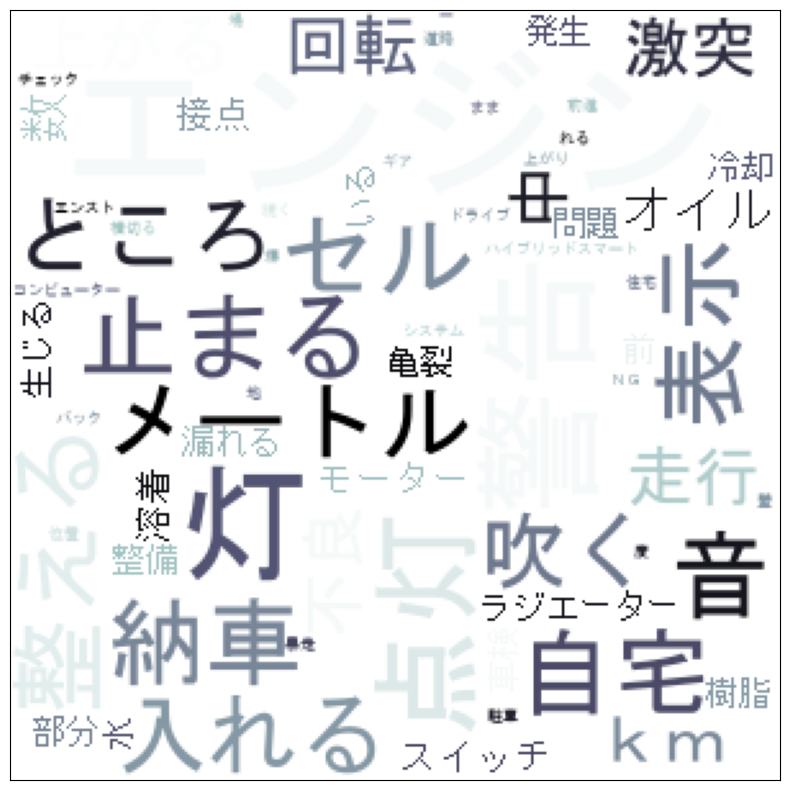

In [25]:
word_cloud( text1_noun )

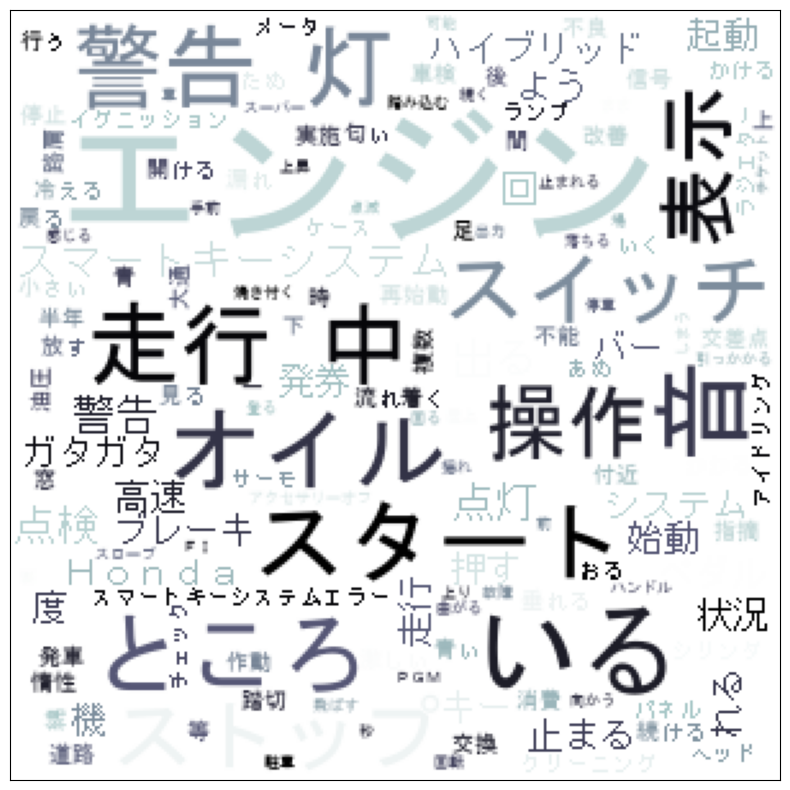

In [26]:
word_cloud( text2_noun )